In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
9,607 cases (7 day average) as of Tue 22 Jun, +613.9 since Mon 21 Jun
188 hospitalised (7 day average) as of Wed 23 Jun, +0.0 since Wed 23 Jun
12 died (7 day average) as of Tue 22 Jun, -0.4 since Mon 21 Jun


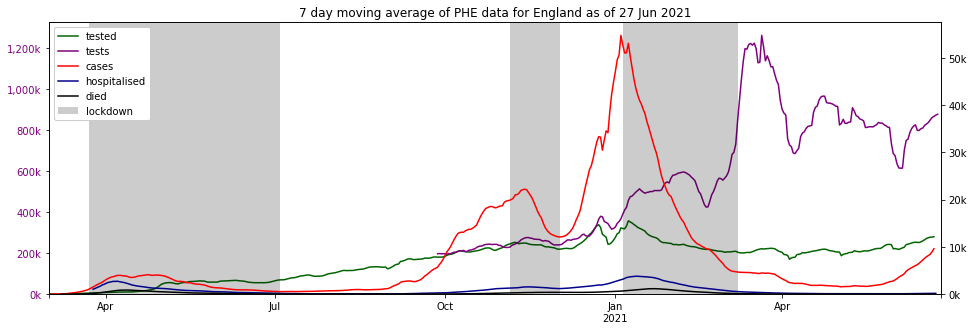

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

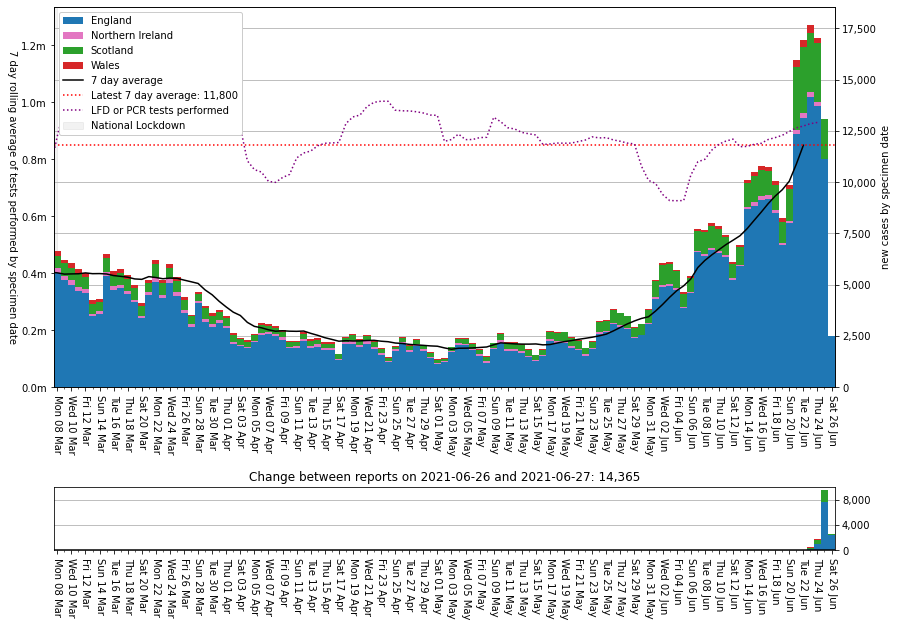

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

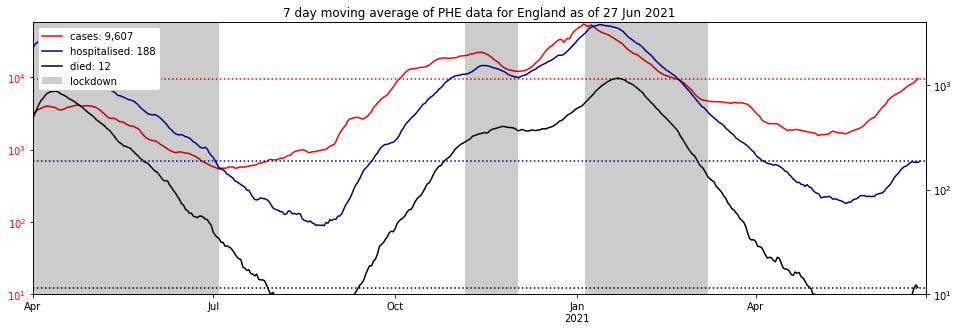

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

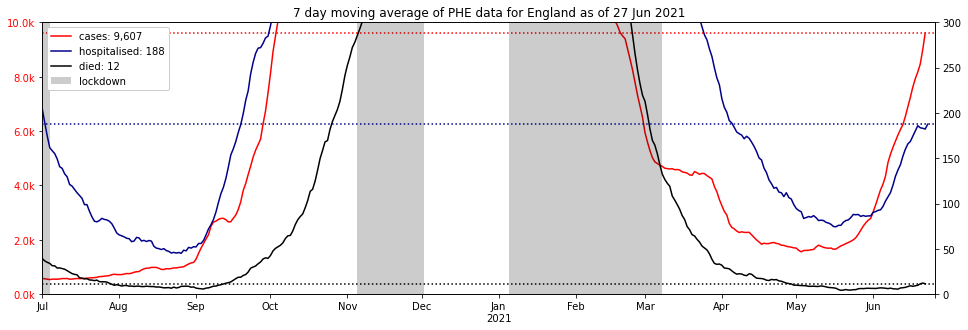

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=10_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=300)

In [7]:
vaccination_changes()

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,27316732.0,37157528.0,9840796.0,56286961,48.531190,17.483260,33.985550
1,Northern Ireland,N92000002,845626.0,1157491.0,311865.0,1893667,44.655475,16.468841,38.875684
2,Scotland,S92000003,2679357.0,3747510.0,1068153.0,5463300,49.042831,19.551425,31.405744
3,Wales,W92000004,1618476.0,2252270.0,633794.0,3152879,51.333273,20.102072,28.564655


'partial: 44,314,799 (66.3%), full: 32,460,191'

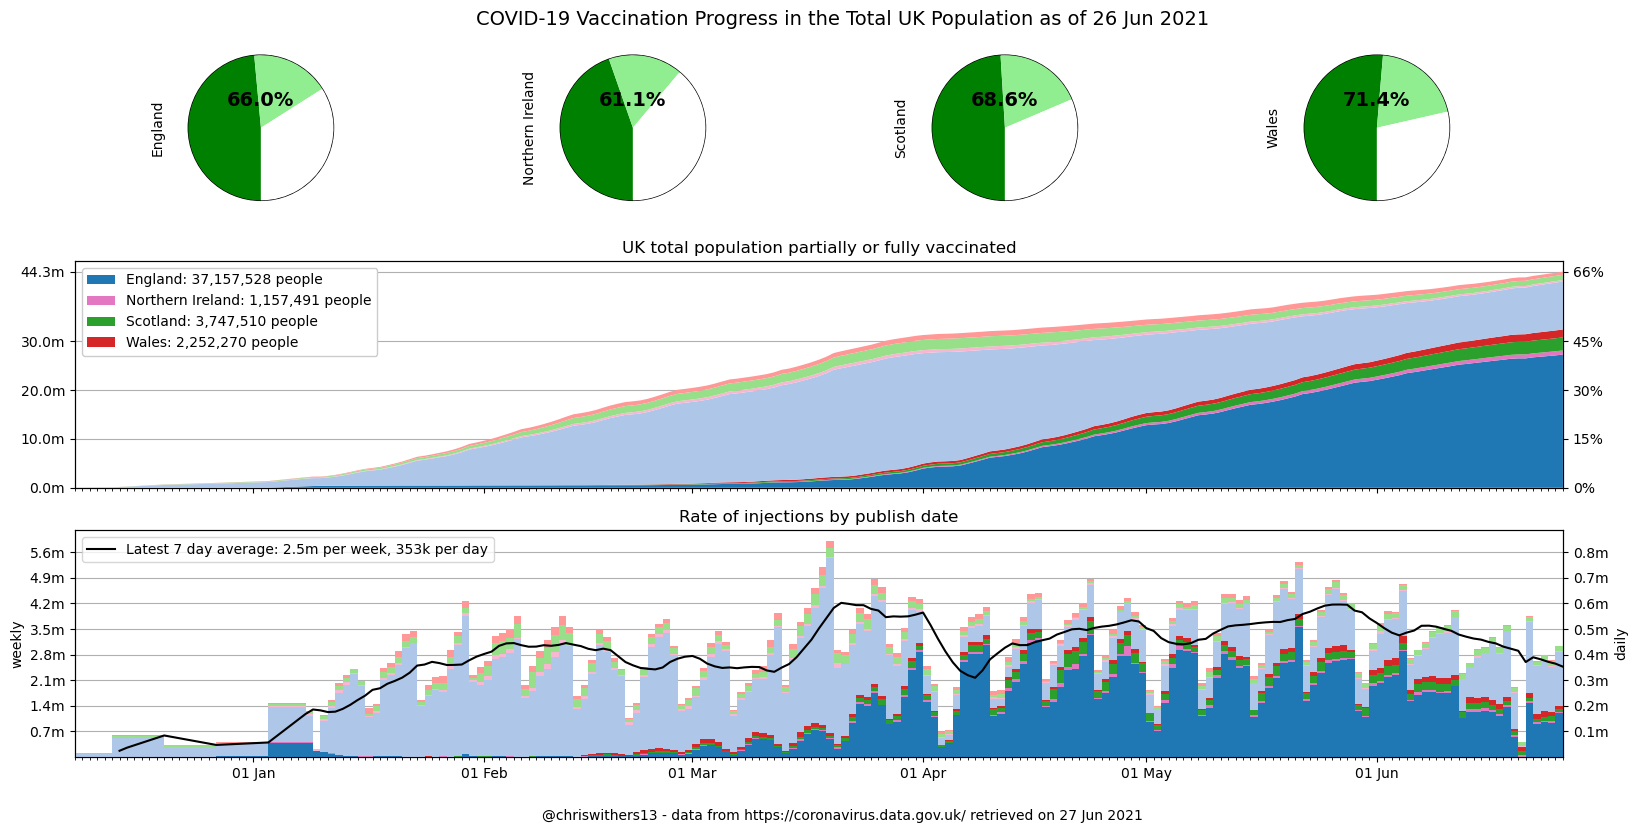

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

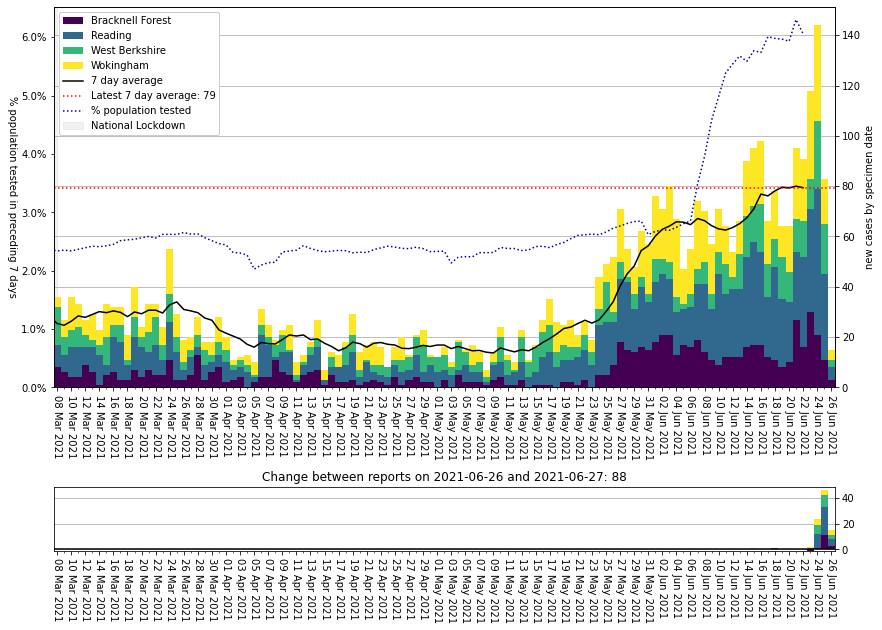

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=unique_people_tested)

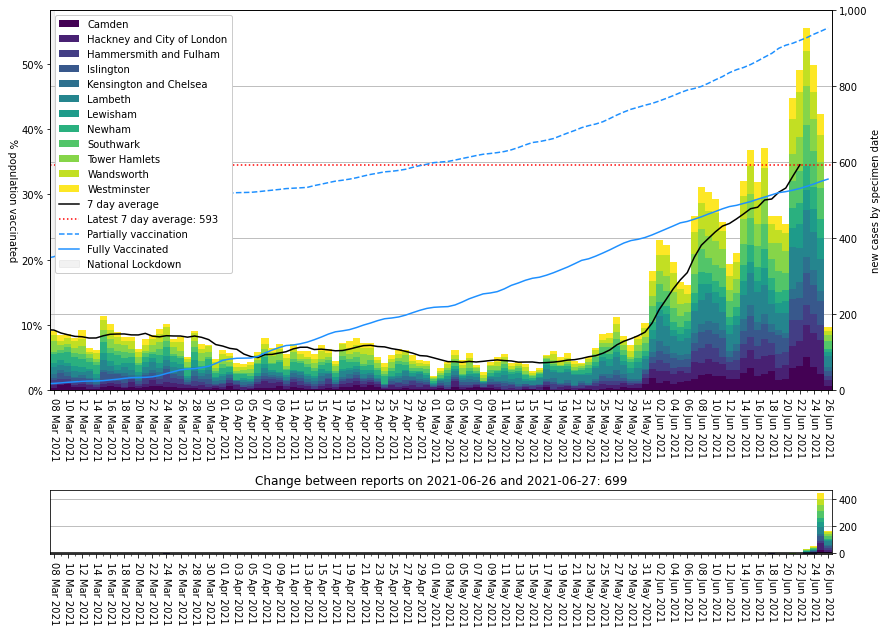

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000042,Dundee City,612.108224,914.0,2021-06-26
S12000010,East Lothian,575.217107,616.0,2021-06-26
E07000120,Hyndburn,513.307750,416.0,2021-06-26
S12000019,Midlothian,510.491023,472.0,2021-06-26
S12000036,City of Edinburgh,477.968491,2509.0,2021-06-26
E06000008,Blackburn with Darwen,421.520949,631.0,2021-06-26
E07000117,Burnley,396.986055,353.0,2021-06-26
E08000003,Manchester,389.069164,2151.0,2021-06-26
E07000125,Rossendale,383.313282,274.0,2021-06-26


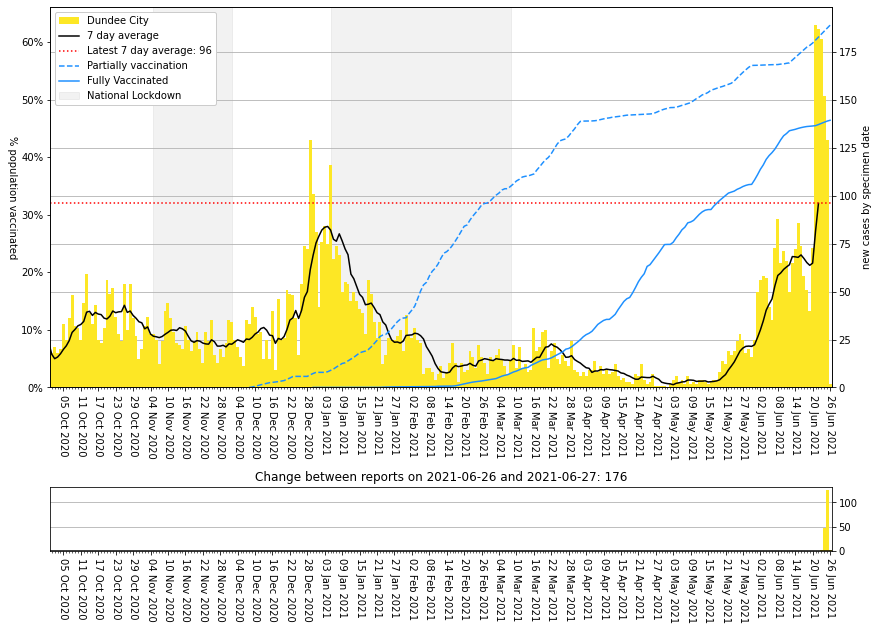

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
S12000036,City of Edinburgh,477.968491,2509.0,2021-06-26
E08000035,Leeds,272.335618,2160.0,2021-06-26
E08000003,Manchester,389.069164,2151.0,2021-06-26
E08000025,Birmingham,174.371352,1991.0,2021-06-26
S12000049,Glasgow City,299.627243,1897.0,2021-06-26
E06000047,County Durham,339.751063,1801.0,2021-06-26
E08000012,Liverpool,319.049397,1589.0,2021-06-26
E08000010,Wigan,370.593497,1218.0,2021-06-26
E08000021,Newcastle upon Tyne,375.140347,1136.0,2021-06-26


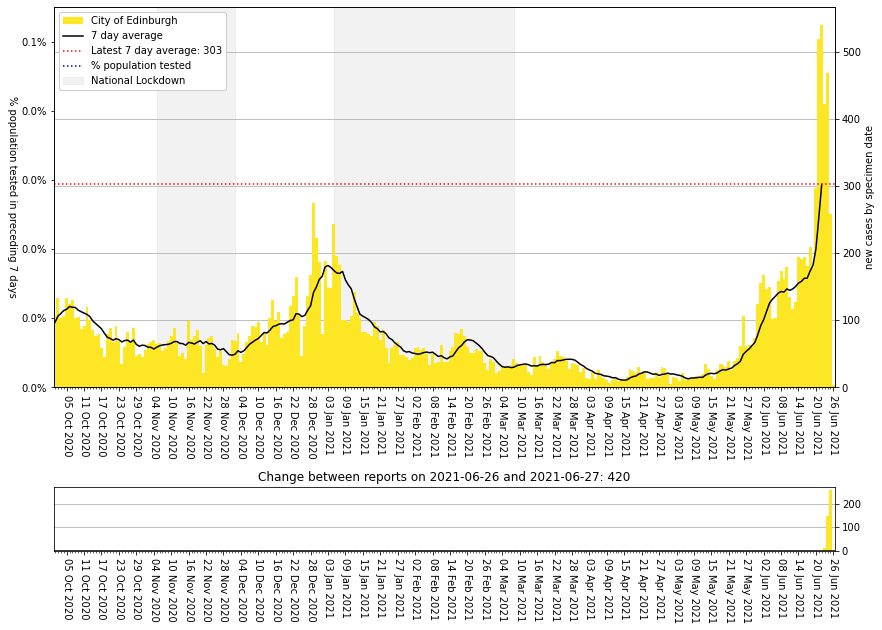

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.5

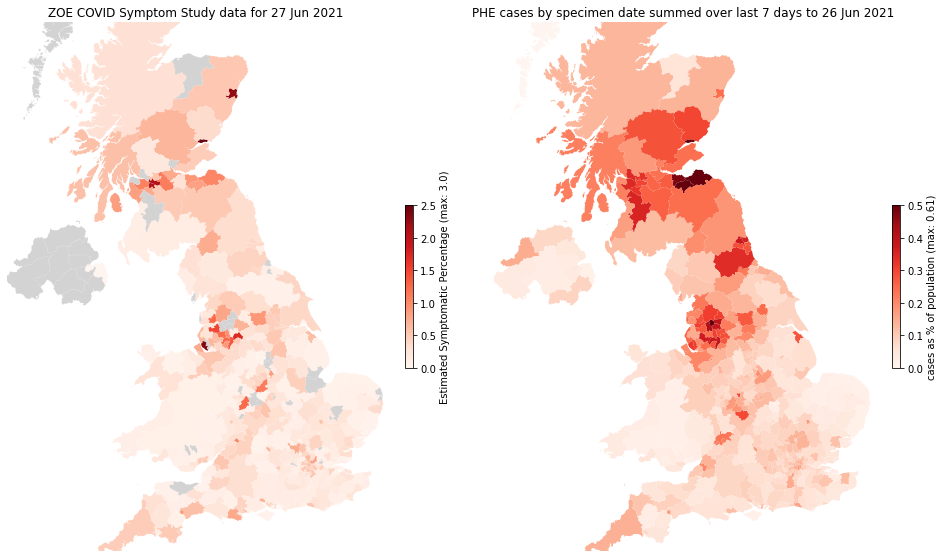

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...